# Computational Thinking - Activity 

## Modeling the motion of a ball dropped from a very tall tower


Computational thinking allows one to increase model complexity and accuracy without making the problem solving more intractable. 

Let's use some of the basic code from our introduction to model the motion of a ball dropped from a tower. Let's then consider methods to improve our model:

- No drag. Constant gravity.
- No drag. Altitude dependend gravitational force.
- Add drag. Constant gravity. Constant atmospheric density. 
- Add drag. Constant gravity. Changing atmospheric density. 
- Put it all together.  


- If the tower is very tall, the force of gravity can no longer be considered to be constant. 

### Dropping a ball from a tower with constant gravity and no drag

Exact solution:

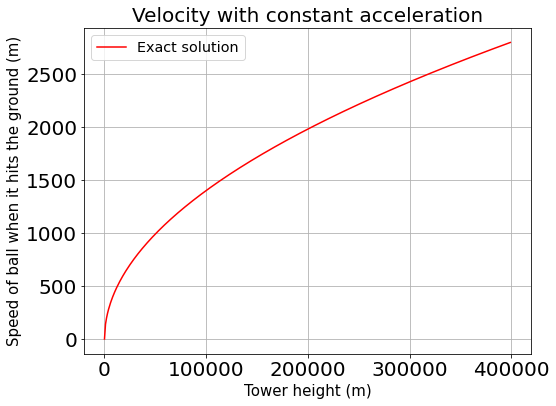

In [57]:
def velocity_constant_a(a,velocity_initial,delta_x):   #Velocity for motion with constant acceleration 
   return np.sqrt(velocity_initial**2 + 2*a*delta_x)

height_array = np.arange(0,400000,1000 ) #unit m

# Calculate the final velocity for every height stored in the building height array
final_velocity_array = velocity_constant_a(9.81,0,height_array)

plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution") 
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  

Computational solution:

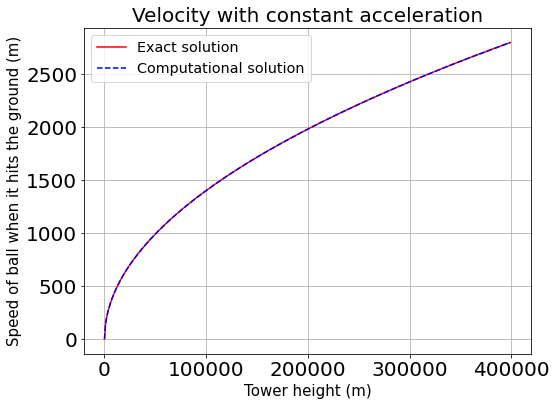

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   # Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   # Displacement for constant velocity (no acceleration)
   return a*t

def f_grav( m_object, g):  # Force of gravity on an object near the surface of the earth
    return -m_object*g 

# Utilize a small time step
time_step = 0.01 # units = seconds

# Define constants
g    = 9.81       # acceleration due to gravity [m/s^2]
mass = 1 # [kg]

# Define an empty list of final velocities. We will append to this list in order to track the final velocity reached by the ball for each height.
list_of_final_velocities = []

# Perform method 2 (numerical solution)
#  Iterate over many different heights
#  For each height, track the motion of the ball as it falls by repeatedly 
#    applying physics motion equations over many small time steps until the ball hits the ground

for height in height_array: # Iterate over many different possible starting heights for the ball
    y_position = height     # Set the initial y_position of the ball to be the starting height
    velocity = 0            # Set the initial velocity of the ball to be zero (we are dropping the ball)
    while y_position > 0:   # This code will repeat until the ball hits the ground (defined to be y=0)
            
        net_force =  f_grav(mass,g) 
            
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    list_of_final_velocities.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  


### Dropping a ball from a tower with simple drag

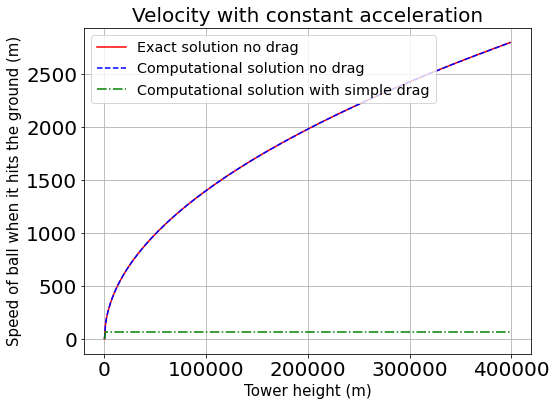

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

# Utilize a small time step
time_step = 0.1 # units = seconds

# Define constants
mass = 100.0        # [kg]
g    = 9.81       # acceleration due to gravity [m/s^2]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        force = -mass*g + f_drag(drag_constant,velocity)
        acceleration = force/mass
        
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution no drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()  

### Dropping a ball from a tower with no drag, variable g

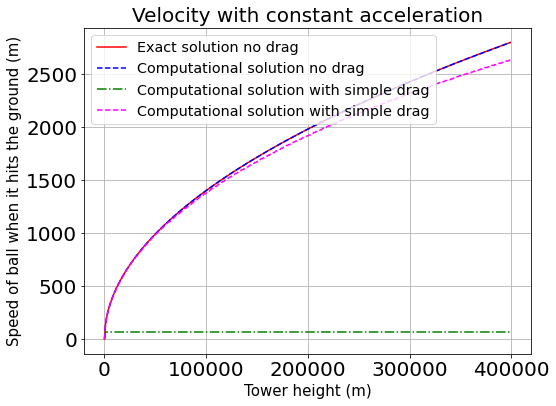

In [66]:


import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

def f_grav(G, M_Earth, m_object,R_Earth, height_above_surface):
    return -G * M_Earth * m_object / (R_Earth + height_above_surface)**2

# Utilize a small time step
time_step = 1 # units = seconds

# Define constants
mass = 100.0        # [kg]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
G    = 6.6743 * 10**(-11) #Gravitational constant [m^3 kg^-1 s^-2]
M_Earth = 5.972 * 10**24     #Mass of the Earth [kg]
R_Earth = 6.3781 * 10**6 #Radius of the Earth [m]

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag_and_variable_Fgrav = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        force = f_grav(G, M_Earth, mass, R_Earth, height) #+ f_drag(drag_constant,velocity)
        acceleration = force/mass
        #print(f_grav(G, M_Earth, mass, R_Earth, height),mass*9.81 )
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag_and_variable_Fgrav.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution no drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution with simple drag") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()

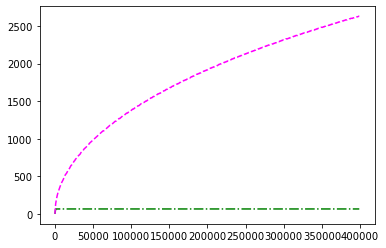

In [68]:
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution with simple drag") # Plot method 2

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

#Define our funcitons

def displacement_constant_v(v,t):   #Displacement for constant velocity (no acceleration)
   return v*t

def velocity_change(a,t):   #Displacement for constant velocity (no acceleration)
   return a*t

def f_drag(C_drag,v):   #Displacement for constant velocity (no acceleration)
   return C_drag*v**2

def f_grav(G, M_Earth, m_object,R_Earth, height_above_surface):
    return -G * M_Earth * m_object / (R_Earth + height_above_surface)**2

def pressure(height):
    return (100*(44331.514-height)/(11880.516))**(1/0.1902632)

# Utilize a small time step
time_step = 1 # units = seconds

# Define constants
mass = 100.0        # [kg]
rho  = 1.22       # air density [kg/m^3]
D    = 0.47       # Drag coefficient
R    = 0.5       # Radius of sphere [m]
G    = 6.6743 * 10**(-11) #Gravitational constant [m^3 kg^-1 s^-2]
M_Earth = 5.972 * 10**24     #Mass of the Earth [kg]
R_Earth = 6.3781 * 10**6 #Radius of the Earth [m]

# Define an empty list of positions. We will append to this list in order to track and plot the position after each time step.

positions = []
list_of_final_velocities_with_drag_and_variable_Fgrav = []

# Perform method 2 (numerical solution)

for height in height_array:
    y_position = height
    velocity = 0
    
    while y_position > 0:
        
        drag_constant =  (rho*D*np.pi*R**2)/2
        
        force = f_grav(G, M_Earth, mass, R_Earth, height) #+ f_drag(drag_constant,velocity)
        acceleration = force/mass
        #print(f_grav(G, M_Earth, mass, R_Earth, height),mass*9.81 )
        #print(velocity,acceleration,velocity_change(acceleration,time_step))
              
        # Update the previous velocity to include the change in velocity due to acceleration
        velocity = velocity + velocity_change(acceleration,time_step) 
    
        # Update the current position of the object to incude the displacement due to the current velocity during this time interval
        y_position = y_position + displacement_constant_v(velocity,time_step)
    

    #print("Height ", height, "Final velocity",velocity)
    list_of_final_velocities_with_drag_and_variable_Fgrav.append(velocity)
    
    
    
# Plot
plt.figure(figsize=(8,6))
plt.plot(height_array, final_velocity_array, color='red', label = "Exact solution no drag") 
plt.plot(height_array, np.fabs(list_of_final_velocities), "--", color='blue', label = "Computational solution no drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag), "-.", color='green', label = "Computational solution with simple drag") # Plot method 2
plt.plot(height_array, np.fabs(list_of_final_velocities_with_drag_and_variable_Fgrav), "--", color='magenta', label = "Computational solution with simple drag") # Plot method 2
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel("Tower height (m)"      , fontsize=15)
plt.ylabel("Speed of ball when it hits the ground (m)"      , fontsize=15)
plt.title('Velocity with constant acceleration', fontsize=20)
plt.grid(True)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.show()